### Largest fines by offence type. Only interested in regulatfines incurred by financial services companies in the US. Data range 2001-2018.

In [1]:
#Violations dataset
import pandas as pd
import numpy as np
#Plot dependencies
import matplotlib.pyplot as plt
from matplotlib import pyplot
 

In [3]:
#Function to get data and gather sub section of largest fines for plot. Subset of data slices the largest 100 fines
def get_data():
   global x 
   g= pd.read_csv('/Users/brianfarrell/MPhil-UCD/violations.csv') 
   g.rename(columns={'Parent Company':'parent','Penalty Amount': 'penalty','Major Industry of Parent': 'parent_industry','Primary Offense': 'offence'},inplace=True)
   banking = pd.DataFrame(g.loc[g.parent_industry  == 'financial services'])
   #Clean up penalty column 
   banking['penalty']= banking.penalty.apply(lambda x: x.strip('$')) 
   banking['penalty'] = banking['penalty'].str.replace(',','').astype(float)
   #sort penalty fines in decending order
   bank_1 = banking.sort_values('penalty',ascending=False) 
   #Get largest 100 fines 
   bank_2= bank_1.head(100).copy()
   #Drop duplicates
   bank_2.drop_duplicates(subset='Penalty Date', keep="first",inplace=True)
   x=bank_2.offence.value_counts()
    
#Function to get data and plot it
def plot_fines():
   get_data()
   company = x.index 
   freq = x.values
   plt.barh(company, freq, align='center',color='blue', alpha=0.6)
   plt.yticks(company,fontsize=20)
   plt.xticks(fontsize=20)
   plt.xlabel('Number of large fines',fontsize=25,fontstyle='italic')
   plt.ylabel(' Types of offences',fontsize=25,fontstyle='italic')
   plt.title('Largest fines imposed on financial services companies by US regulators (2001-2018)',fontsize=35,fontstyle='italic')
   plt.rcParams["figure.figsize"] = [30,15]
   plt.show()


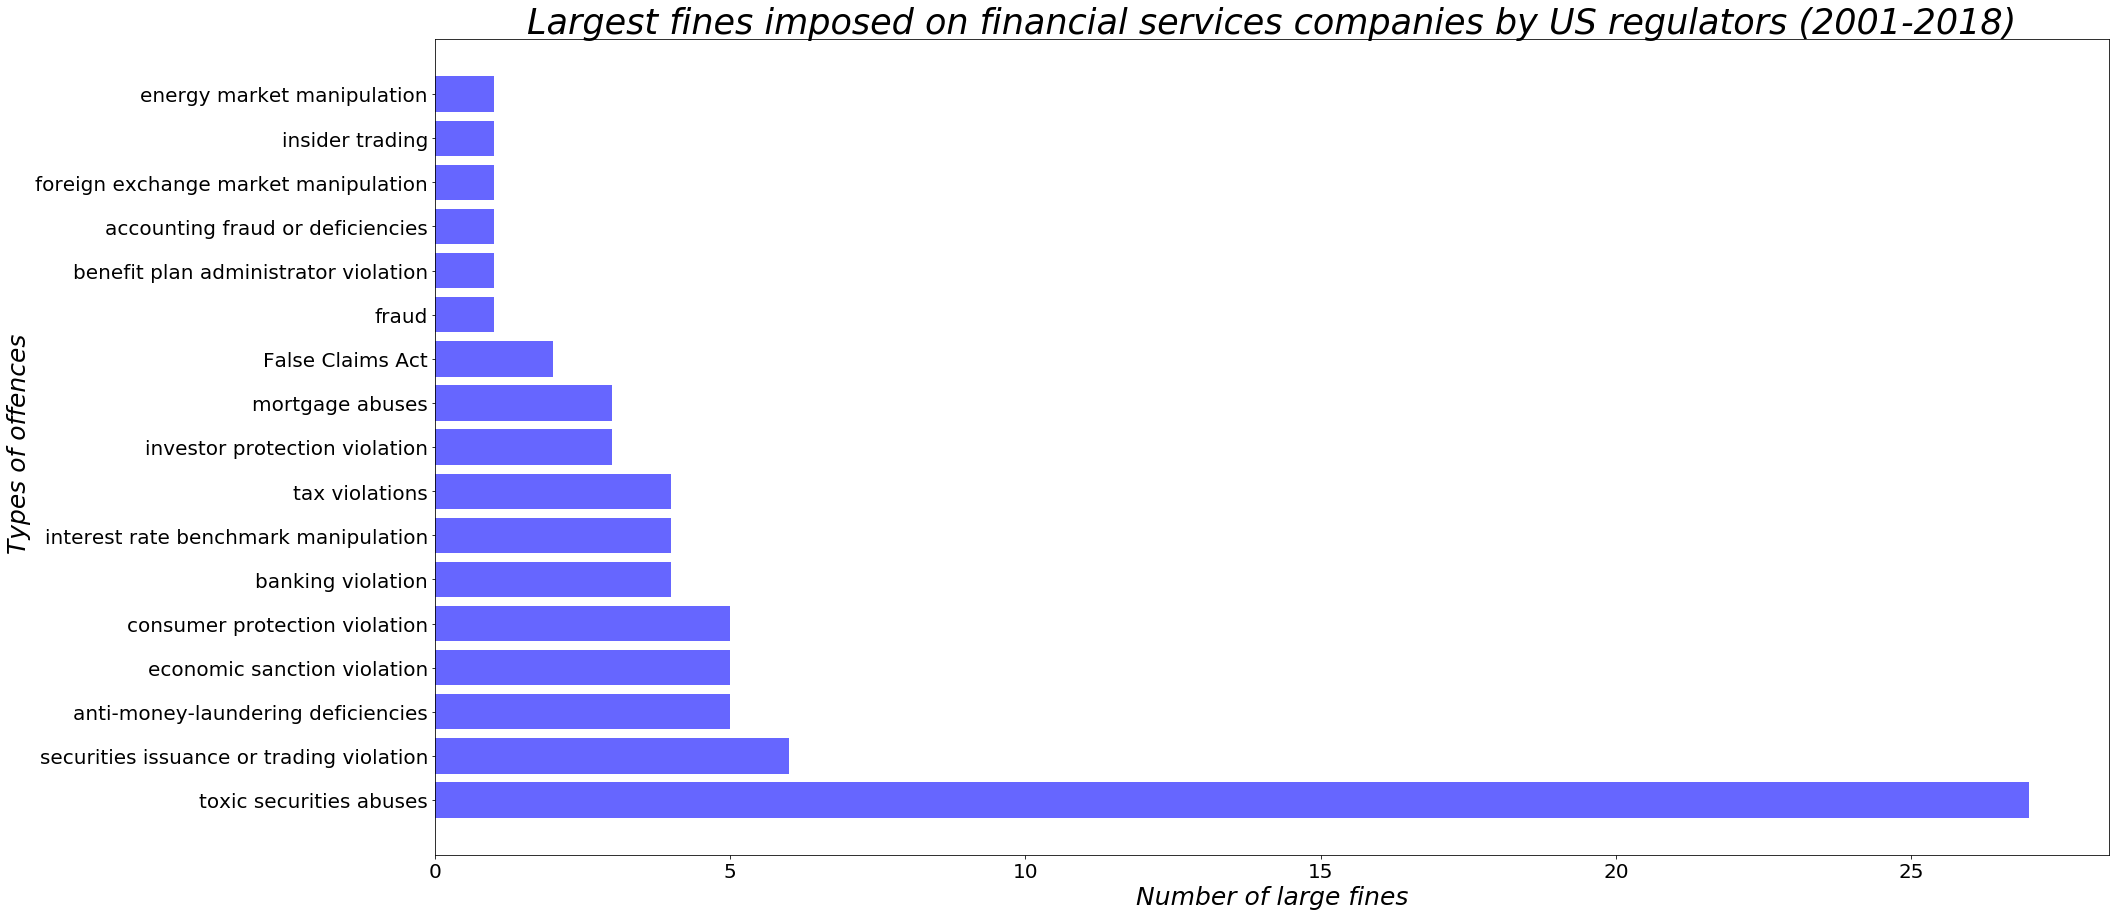

In [5]:
#Run plot of largest fines by type of offence.
plot_fines()